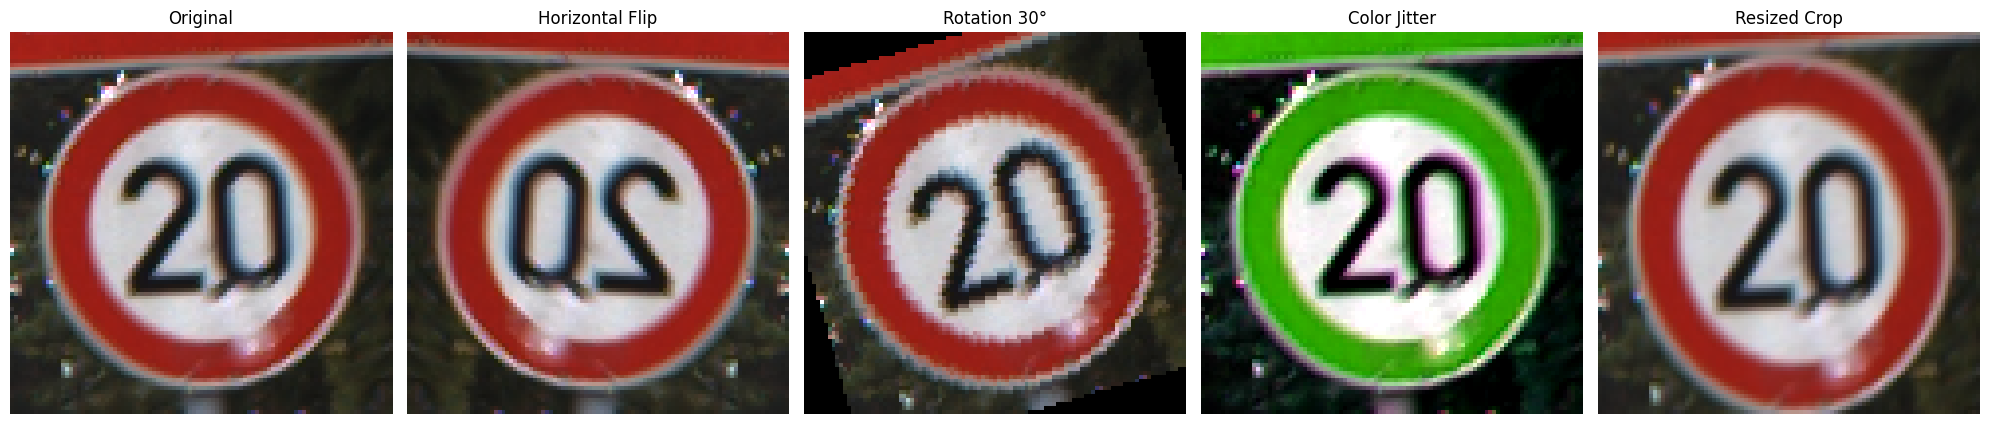

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from PIL import Image
import torchvision.transforms as transforms

# Load the CSV file into a DataFrame
csv_path = './data/Train.csv'
df = pd.read_csv(csv_path)
# Filter images for a specific class (e.g., ClassId = 0)
class_id = 0
class_images = ['./data/'+ im_path for im_path in df[df['ClassId'] == class_id]['Path'].tolist()]

# Select a random image from the filtered images
random_image_path = random.choice(class_images)
image = Image.open(random_image_path)

# Define individual data augmentation techniques
transformations = [
    ("Original", None),
    ("Horizontal Flip", transforms.RandomHorizontalFlip(p=1)),
    ("Rotation 30°", transforms.RandomRotation(30)),
    ("Color Jitter", transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)),
    ("Resized Crop", transforms.RandomResizedCrop(size=(image.size[1], image.size[0]), scale=(0.8, 1.0)))
]

# Apply transformations
augmented_images = [(name, transform(image) if transform else image) for name, transform in transformations]

# Display the original and augmented images
fig, axes = plt.subplots(1, len(augmented_images), figsize=(20, 5))

# Show original and augmented images with titles
for i, (name, aug_img) in enumerate(augmented_images):
    axes[i].imshow(aug_img)
    axes[i].set_title(name)
    axes[i].axis('off')

plt.tight_layout()
plt.show()